<a href="https://colab.research.google.com/github/ngcheeyuan/Classification_projects/blob/main/toxic_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [200]:
ds , ds_info = tfds.load('civil_comments' ,
                        shuffle_files = True,
                        with_info = True)

In [201]:
import pandas as pd

## prepping dataframe

In [202]:
train_sample = ds['train'].shuffle(buffer_size = 2000).take(500000)
val_sample = ds['validation'].shuffle(buffer_size = 2000).take(100000)
test_sample = ds['test'].shuffle(buffer_size = 2000).take(100000)

In [203]:
df_train = pd.DataFrame(train_sample).applymap(lambda x : x.numpy())
df_val = pd.DataFrame(val_sample).applymap(lambda x : x.numpy())
df_test = pd.DataFrame(test_sample).applymap(lambda x : x.numpy())

In [204]:
df_train['text'] = df_train['text'].map(lambda x : str(x)[2:-1])
df_val['text'] = df_val['text'].map(lambda x : str(x)[2:-1])
df_test['text'] = df_test['text'].map(lambda x : str(x)[2:-1])

In [205]:
#removing duplicates as the sampling was done with replacement
df_train = df_train.drop(df_train[df_train.duplicated(keep = 'first')].index)
df_val = df_val.drop(df_val[df_val.duplicated(keep = 'first')].index)
df_test = df_test.drop(df_test[df_test.duplicated(keep = 'first')].index)

In [206]:
df_train.head(10)

,identity_attack,insult,obscene,severe_toxicity,sexual_explicit,text,threat,toxicity
0,0.0,0.3,0.1,0.0,0.0,"Brian S12--blind much, or total ignorance, or ...",0.3,0.4
1,0.0,0.0,0.0,0.0,0.0,They always say they are going to leave - but ...,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,>>Speaking of strokes of genius ...\n\n... and...,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,Abraham Pineo Gesner was a Canadian physician ...,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,"""A party of substance"" states Andrew Who. ...",0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,So killing them is the answer ? And you have n...,1.0,1.0
6,0.0,0.0,0.0,0.0,0.0,While I applaud PT for looking at ways to incr...,0.0,0.0
7,0.0,0.3,0.0,0.0,0.0,Trump will drain your pocket hon.,0.0,0.4
8,0.0,0.0,0.0,0.0,0.0,"One never loses siding with solid bishops, of ...",0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,"Funny, no matter what Obama did, you folks on ...",0.0,0.0


In [207]:
df_train.isna().sum()

identity_attack    0
insult             0
obscene            0
severe_toxicity    0
sexual_explicit    0
text               0
threat             0
toxicity           0
dtype: int64

In [208]:
df_val.isna().sum()

identity_attack    0
insult             0
obscene            0
severe_toxicity    0
sexual_explicit    0
text               0
threat             0
toxicity           0
dtype: int64

## Visualizing random texts

In [209]:
df_test.isna().sum()

identity_attack    0
insult             0
obscene            0
severe_toxicity    0
sexual_explicit    0
text               0
threat             0
toxicity           0
dtype: int64

In [210]:
import random

random_index = random.randint(0,len(df_train)-9)

for row in df_train[random_index:random_index+9].itertuples():
  _,attack,insult,obscene,severe_toxic,sexual,text,threat,toxic= row
  print(f'text: {str(text)[:]}')
  print(f'text: {len(str(text))}')
  print(f'attack: {attack}, insults: {insult} obscene: {obscene} severe_toxcity : {severe_toxic}, sexual: {sexual} , threat: {threat}, toxic: {toxic}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')

text: I don't care about the tight budget, where the money comes from or whether or not they partner with the city but the state should provide the necessary public access to that park. \n\nChugach State Park access has been an issue since at least the early 80s and providing adequate parking is a much greater public need than spending more money on studies for that road to nowhere out of Juneau or funding that KABATA gang  and their bridge to nowhere across Knik Arm. So if anyone wants to know where the money would come from, those are my suggestions.
text: 552
attack: 0.0, insults: 0.0 obscene: 0.0 severe_toxcity : 0.0, sexual: 0.0 , threat: 0.0, toxic: 0.0
-----------------------------------------------------------------------------------------------------------------------------------------------------
text: Maybe one day they will pass voter owned elections and then they won't have fundraisers.\n\nAlso noteworthy, not a single fundraiser at a vegan restaurant despite there being 3

In [211]:
pip install vaderSentiment

In [212]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [213]:
analyzer = SentimentIntensityAnalyzer()

In [214]:
import numpy as np
vfunc = np.vectorize(analyzer.polarity_scores)

In [215]:
df_train['text']

0         Brian S12--blind much, or total ignorance, or ...
1         They always say they are going to leave - but ...
2         >>Speaking of strokes of genius ...\n\n... and...
3         Abraham Pineo Gesner was a Canadian physician ...
4         "A party of substance" states Andrew Who.     ...
                                ...                        
499995    Chris,\n\n Trump is not doing well.  The Repub...
499996    I see the zupta  twitterbots out and about tod...
499997    "... full-fledged member in the community of t...
499998    I've noticed he bought a bunch go frontage lot...
499999    forgiving ones enemies is primarily a new test...
Name: text, Length: 496974, dtype: object

In [216]:
df_train['sentiment'] = vfunc(df_train['text'])
df_val['sentiment'] = vfunc(df_val['text'])
df_test['sentiment'] = vfunc(df_test['text'])

In [217]:
df_train.reset_index(drop = True , inplace = True)
df_val.reset_index(drop = True , inplace = True)
df_test.reset_index(drop = True , inplace = True)

In [218]:
df_train = pd.concat([df_train.drop(columns = ['sentiment'] , axis = 'columns') ,pd.json_normalize(df_train['sentiment'])],axis =1 )
df_val = pd.concat([df_val.drop(columns = ['sentiment'] , axis = 'columns') ,pd.json_normalize(df_val['sentiment'])],axis =1 )
df_test = pd.concat([df_test.drop(columns = ['sentiment'] , axis = 'columns') ,pd.json_normalize(df_test['sentiment'])],axis =1 )

In [219]:
df_train[df_train.isnull().any(axis=1)]

,identity_attack,insult,obscene,severe_toxicity,sexual_explicit,text,threat,toxicity,neg,neu,pos,compound


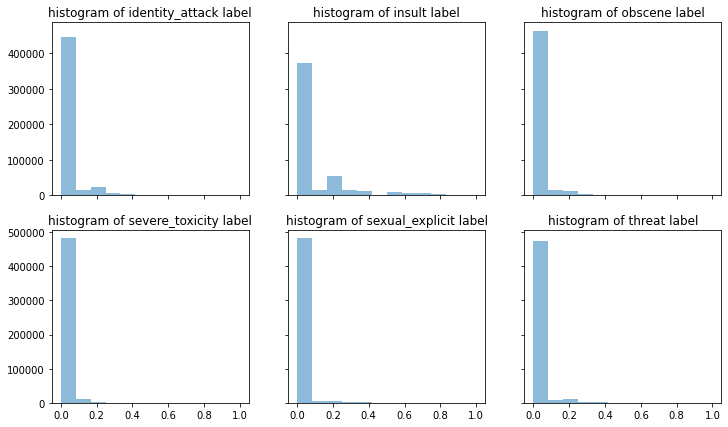

In [220]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(12,7))
ax = ax.ravel() 

for idx,columns in enumerate(['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat']):
  ax[idx].hist(df_train.loc[:,columns], bins=12, alpha=0.5)
  ax[idx].set_title(f'histogram of {columns} label')

Text(0.5, 1.0, 'target label historgram: toxicity')

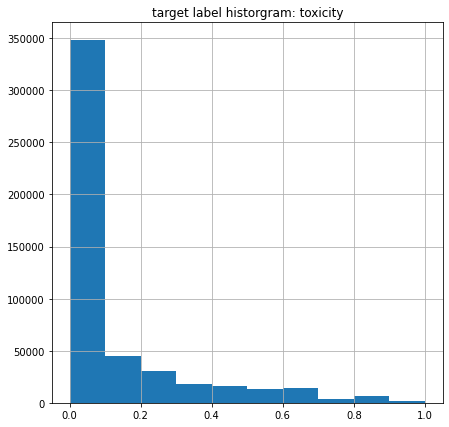

In [221]:
fig,ax = plt.subplots(1,1,figsize = (7,7))
ax = df_train['toxicity'].hist()
ax.set_title(f'target label historgram: toxicity')

In [222]:
def convert_target_class(df,label,threshold):
  '''
  Function to convert target class labels to binary, where positive classes will be where target >= threshold

  df : dataframe
  label : name of the target column, input has to be a string
  threshold : a floating number between 0 and 1
  '''
  temp_df = df.copy()
  temp_df[label] = temp_df[label].map(lambda x : 1 if x >= threshold else 0)

  return temp_df

In [223]:
df_train = convert_target_class(df_train , 'toxicity' , 0.5)
df_val = convert_target_class(df_val , 'toxicity' , 0.5)
df_val = convert_target_class(df_val , 'toxicity' , 0.5)

In [224]:
df_train.toxicity.mean() , df_val.toxicity.mean() , df_test.toxicity.mean()

(0.08035229207161743, 0.07910123018860142, 0.10316588340479929)

In [225]:
X_train = df_train['text']
X_train_indicators = df_train[['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat']]
y_train = df_train['toxicity']

X_val = df_val['text']
X_val_indicators = df_val[['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat']]
y_val = df_val['toxicity']

X_test = df_test['text']
X_val_indicators = df_val[['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat']]
y_test = df_test['toxicity']

In [226]:
len(X_train),len(y_train), len(X_val), len(y_val), len(X_test), len(y_test)

(496974, 496974, 96977, 96977, 96972, 96972)

In [227]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [228]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [229]:
text_vec = TextVectorization(max_tokens= 10000,
                             standardize = 'lower_and_strip_punctuation',
                             split = 'whitespace',
                             ngrams = None,
                             output_mode = 'int',
                             output_sequence_length = None, #pad text to have the same length as the longest text,
                             pad_to_max_tokens = True)

In [230]:
#Average number of tokens in the training tweets
round(sum([len(i.split()) for i in X_train])/len(X_train))

51

In [231]:
#setup text vectorization variables
max_vocab_length = 10000 # max num of words to have in our vocab
max_length = 51 # max length of our sequence

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_sequence_length = max_length)

In [232]:
#Fit the text vectorizer to the training text
text_vectorizer.adapt(X_train)

In [233]:
sample_sentence = "Trump is awesome!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 51), dtype=int64, numpy=
array([[  59,    7, 3069,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]])>

In [234]:
# get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]

In [235]:
print(top_5_words)
print(bottom_5_words)

['', '[UNK]', 'the', 'to', 'and']
['assemble', 'advancing', 'abundant', 'absorbed', 'versa']


In [236]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)
embedding

## Baseline model

In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [238]:
model_0 = Pipeline([('tfidf',TfidfVectorizer()),
                     ('clf',MultinomialNB())])

In [239]:
model_0.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [240]:
from sklearn.metrics import accuracy_score , f1_score

In [241]:
model_0.score(X_val , y_val)

0.9217546428534601

In [242]:
base_preds = model_0.predict(X_val)

In [243]:
f1_score(y_val , base_preds ,average = 'weighted')

0.8852784061964807

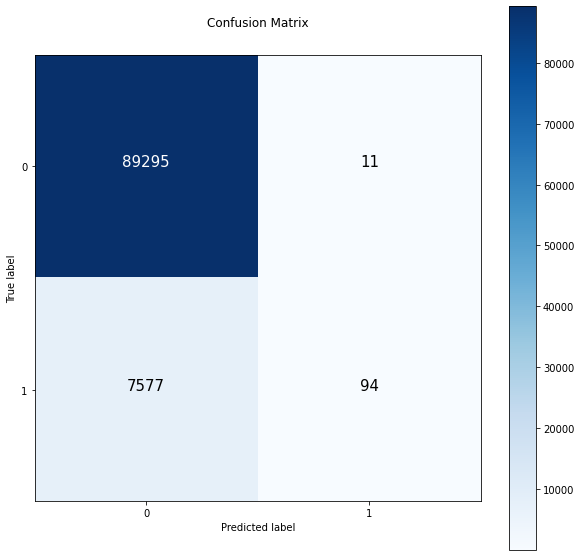

In [244]:
make_confusion_matrix(y_val,base_preds, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False)

## Model 2 - Logistic Regression

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
model_1 = LogisticRegression(class_weight = 'balance')

In [247]:
model_1.fit(X_train_indicators,y_train)

LogisticRegression(class_weight='balance')

In [248]:
model_1.score(X_val_indicators , y_val)

0.9845633500726977

In [249]:
base_preds = model_1.predict(X_val_indicators)

In [250]:
f1_score(y_val , base_preds ,average = 'weighted')

0.9845518325968401

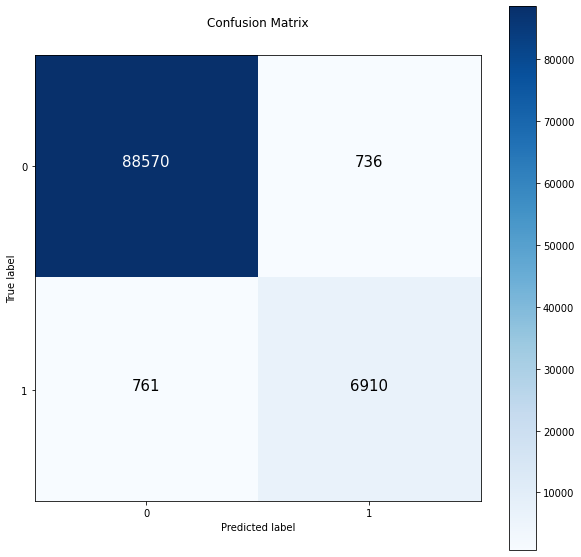

In [251]:
make_confusion_matrix(y_val,base_preds, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False)

1. The model was unable to differentiate  between classes due to the data imbalance

## Model 2 : Ensemble logistic regression + naive bayes

In [252]:
from sklearn.ensemble import VotingClassifier
from sklearn.base import TransformerMixin, BaseEstimator
import numpy as np
from sklearn.ensemble import VotingClassifier

######################
# custom transformer for sklearn pipeline
class ColumnExtractor(TransformerMixin, BaseEstimator):
    def __init__(self, cols):
        self.cols = cols

    def transform(self, X):
      if len(self.cols) == 1:
        return X[self.cols[0]]
      else:
        return X[self.cols]

    def fit(self, X, y=None):
        return self

# fit clf1 with df1
pipe1 = Pipeline([
    ('col_extract', ColumnExtractor( cols= ['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat'] )), # selecting features 0 and 1 (df1) to be used with LR (clf1)
    ('clf', LogisticRegression(class_weight = 'balance'))
    ])

pipe1.fit(df_train, y_train) # sanity check
print(f'accuracy - pipe1, logistic regression :{pipe1.score(df_val,y_val)}') # sanity check

# fit clf2 with df2
pipe2 = Pipeline([
    ('col_extract', ColumnExtractor( cols=['text'])), # selecting features 2 and 3 (df2) to be used with SVC (clf2)
    ('tfidf',TfidfVectorizer()),
    ('clf', MultinomialNB())
    ])

pipe2.fit(df_train, y_train) # sanity check
print(f'accuracy - pipe2, MultinomialNB , with TFidfVectorizer:{pipe2.score(df_val,y_val)}') # sanity check

######################
# ensemble/voting classifier where clf1 fitted with df1 and clf2 fitted with df2
eclf = VotingClassifier(estimators=[('df1-clf1', pipe1), ('df2-clf2', pipe2)], voting='soft', weights= [1.5, 0.5])
eclf.fit(df_train, y_train)
print(f'accuracy - voting classifier with pipe1 and pipe 2 :{eclf.score(df_val,y_val)}')


accuracy - pipe1, logistic regression :0.9845633500726977
accuracy - pipe2, MultinomialNB , with TFidfVectorizer:0.9217546428534601
accuracy - voting classifier with pipe1 and pipe 2 :0.9812017282448415


In [253]:
model_2_predictions = eclf.predict(df_val)

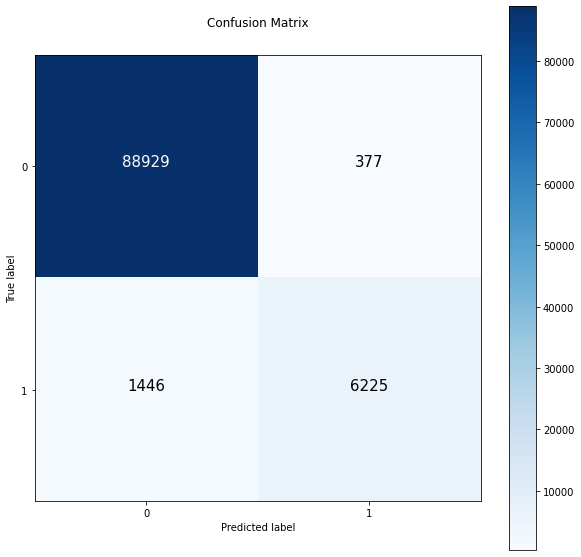

In [254]:
make_confusion_matrix(y_val,model_2_predictions, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False)

## Model 3 : USE encoder + Logistic Regression

In [255]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        trainable = False,
                                        name = 'universal_sentence_encoder')

In [256]:
import tensorflow as tf
from tensorflow.keras import layers

In [257]:
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline as imblearnpipe


# ros = RandomOverSampler(sampling_strategy = {0:457046,1:457046},random_state=42)
# rus = RandomUnderSampler(sampling_strategy = {0:100000,1:100000} , random_state=42)

# imbpipe = imblearnpipe([('ros',ros)])
# X_train, y_train = imbpipe.fit_resample(df_train[['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat','text']], df_train['toxicity'])
X_train = df_train[['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat','text']]
y_train = df_train['toxicity']

In [326]:
#1.
token_inputs = layers.Input(shape = [], dtype = tf.string , name = 'token_inputs')
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation = 'relu')(token_embeddings)
token_model = tf.keras.Model(inputs = token_inputs,
                             outputs = token_outputs,
                             name = 'token_model')

#2. Building a logistic regression layer
numeric_inputs = layers.Input(shape = (6,) , dtype = tf.int32, name = 'numeric_input')
x = layers.Dense(2, activation = 'sigmoid')(numeric_inputs)
numeric_model = tf.keras.Model(inputs = numeric_inputs,
                               outputs = x , 
                               name = 'logistic_regression layer')

#5. Combine token and char embedding into a hybrid embedding

combined_embeddings = layers.Concatenate(name = 'token_vader')([token_model.output,
                                                                numeric_model.output])


z = layers.Dense(129,activation = 'sigmoid')(combined_embeddings)
z = layers.Dense(64,activation = 'relu')(z)
z = layers.Dropout(0.5)(z)


#7. Create output layer
output_layer = layers.Dense(2,activation = 'sigmoid' , name = 'output_layer')(z)

#8. Combine model

model_3 = tf.keras.Model(inputs = [token_model.input,
                                   numeric_model.input
                                   ],
                         outputs = output_layer,
                         name = 'token_vader_model')

In [327]:
model_3.summary()

Model: "token_vader_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_inputs[0][0]']           
 rasLayer)                                                                                        
                                                                                                  
 numeric_input (InputLayer)     [(None, 6)]          0           []                               
                                                                                                  
 dense_78 (Dense)               (None, 128)          65664       ['universal_sente

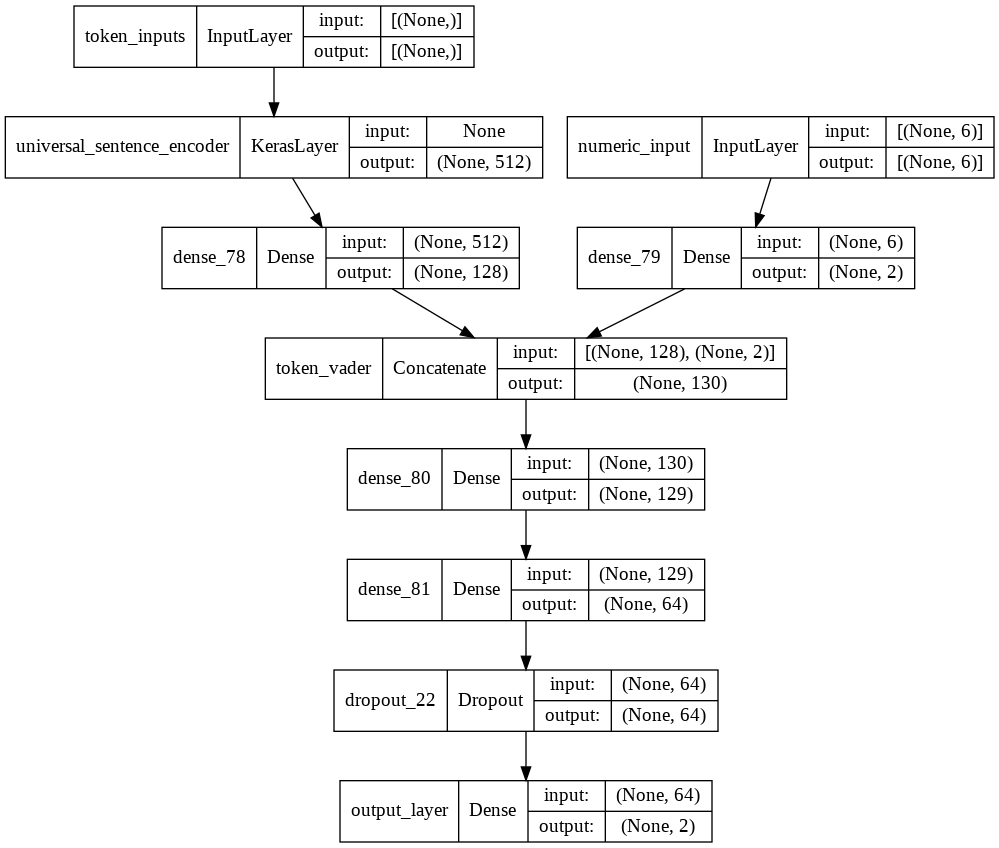

In [328]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, show_shapes = True)

In [329]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [330]:
one_hot_encoder = OneHotEncoder(sparse = False)
train_labels_one_hot = one_hot_encoder.fit_transform(y_train.to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(y_val.to_numpy().reshape(-1,1))

In [331]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(y_train.to_numpy())
val_labels_encoded = label_encoder.transform(y_val.to_numpy())

In [332]:
train_sentences = X_train.text.tolist()
train_numeric = X_train[['identity_attack', 'insult', 'obscene', 'severe_toxicity','sexual_explicit', 'threat']]

val_sentences = df_val.text.tolist()
val_numeric = df_val[['identity_attack', 'insult', 'obscene', 'severe_toxicity','sexual_explicit', 'threat']]

In [333]:
train_token_numeric_data = tf.data.Dataset.from_tensor_slices((train_sentences,
                                                             train_numeric
                                                             ))

train_token_numeric_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_token_numeric_dataset = tf.data.Dataset.zip((train_token_numeric_data,
                                                   train_token_numeric_labels))

train_token_numeric_dataset = train_token_numeric_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


val_token_numeric_data = tf.data.Dataset.from_tensor_slices((val_sentences,
                                                             val_numeric
                                                             ))

val_token_numeric_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_token_numeric_dataset = tf.data.Dataset.zip((val_token_numeric_data,
                                                 val_token_numeric_labels))

val_token_numeric_dataset = val_token_numeric_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [334]:
print(train_token_numeric_dataset)
print(val_token_numeric_dataset)

<PrefetchDataset shapes: (((None,), (None, 6)), (None, 2)), types: ((tf.string, tf.float64), tf.float64)>
<PrefetchDataset shapes: (((None,), (None, 6)), (None, 2)), types: ((tf.string, tf.float64), tf.float64)>


In [335]:
len(y_train)/(y_train.sum())

12.445195702802193

In [336]:
earlystopping = tf.keras.callbacks.EarlyStopping(min_delta = 0.001,monitor = 'val_auc_14', verbose = 1 , patience = 5)

In [337]:
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.2),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = tf.keras.metrics.AUC(curve='PR')
                )

In [338]:
classweights = {0:1,
                1:len(y_train)/(y_train.sum())}

In [339]:
model_3_history = model_3.fit(train_token_numeric_dataset,
                              steps_per_epoch = int(len(train_token_numeric_dataset)//32),
                              epochs = 20,
                              validation_data = val_token_numeric_dataset,
                              class_weight = classweights,
                              validation_steps = int(len(val_token_numeric_dataset)//32),
                              callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoint',
                                                                              monitor = 'val_auc_14',
                                                                              save_best_only = True,
                                                                              save_weights_only = False),
                                           earlystopping])

Epoch 1/20
484/485 [============================>.] - ETA: 0s - loss: 1.2268 - auc_14: 0.6705INFO:tensorflow:Assets written to: model_checkpoint/assets


INFO:tensorflow:Assets written to: model_checkpoint/assets


485/485 [==============================] - 26s 50ms/step - loss: 1.2270 - auc_14: 0.6708 - val_loss: 0.5983 - val_auc_14: 0.8070
Epoch 2/20
485/485 [==============================] - 13s 28ms/step - loss: 1.1324 - auc_14: 0.7872 - val_loss: 0.4963 - val_auc_14: 0.9322
Epoch 3/20
485/485 [==============================] - ETA: 0s - loss: 1.1237 - auc_14: 0.7977INFO:tensorflow:Assets written to: model_checkpoint/assets


INFO:tensorflow:Assets written to: model_checkpoint/assets


485/485 [==============================] - 117s 242ms/step - loss: 1.1237 - auc_14: 0.7977 - val_loss: 0.6082 - val_auc_14: 0.7943
Epoch 4/20
483/485 [============================>.] - ETA: 0s - loss: 1.0966 - auc_14: 0.8139INFO:tensorflow:Assets written to: model_checkpoint/assets


INFO:tensorflow:Assets written to: model_checkpoint/assets


485/485 [==============================] - 24s 49ms/step - loss: 1.0967 - auc_14: 0.8136 - val_loss: 0.6268 - val_auc_14: 0.7596
Epoch 5/20
485/485 [==============================] - 13s 27ms/step - loss: 1.0972 - auc_14: 0.8112 - val_loss: 0.5513 - val_auc_14: 0.8714
Epoch 6/20
485/485 [==============================] - 13s 27ms/step - loss: 1.1421 - auc_14: 0.7897 - val_loss: 0.6205 - val_auc_14: 0.7620
Epoch 7/20
485/485 [==============================] - 13s 28ms/step - loss: 1.1196 - auc_14: 0.8045 - val_loss: 0.5949 - val_auc_14: 0.8129
Epoch 8/20
485/485 [==============================] - 13s 27ms/step - loss: 1.0864 - auc_14: 0.8235 - val_loss: 0.5448 - val_auc_14: 0.8815
Epoch 9/20
485/485 [==============================] - 13s 27ms/step - loss: 1.0787 - auc_14: 0.8257 - val_loss: 0.5556 - val_auc_14: 0.8642
Epoch 00009: early stopping


In [340]:
model_3 = tf.keras.models.load_model('model_checkpoint/')

In [341]:
model_3.evaluate(val_token_numeric_dataset)

3031/3031 [==============================] - 69s 22ms/step - loss: 0.6210 - auc_14: 0.7683


[0.6210083365440369, 0.768345832824707]

In [342]:
preds = model_3.predict(val_token_numeric_dataset)

In [343]:
preds

array([[0.16717924, 0.8326807 ],
       [0.17174152, 0.82807153],
       [0.44176853, 0.5627157 ],
       ...,
       [0.19316919, 0.80720544],
       [0.64183915, 0.36466184],
       [0.810389  , 0.193633  ]], dtype=float32)

In [344]:
predictions = np.argmax(preds,axis = 1)

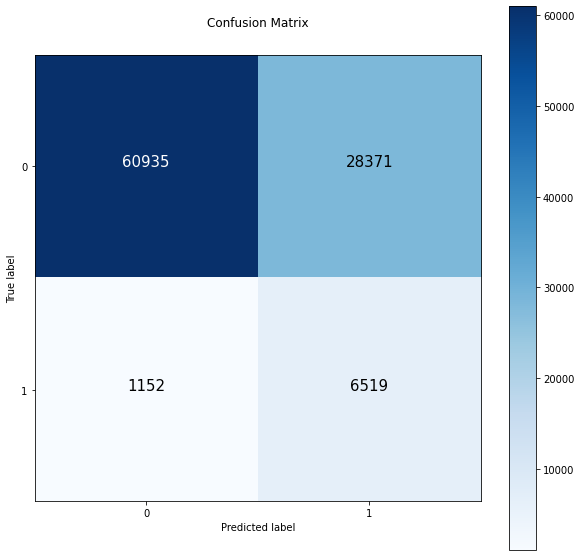

In [346]:
make_confusion_matrix(y_val,predictions, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False)

In [350]:
m3_history_df = pd.DataFrame(model_3_history.history)
m3_history_df['epoch'] = range(0,len(m3_history_df))

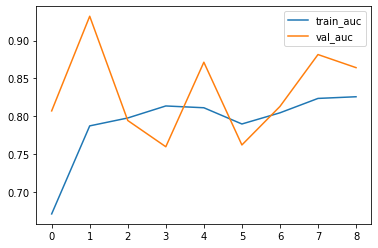

In [357]:
plt.plot(m3_history_df.epoch ,m3_history_df.auc_14 , label = 'train_auc')
plt.plot(m3_history_df.epoch ,m3_history_df.val_auc_14 , label = 'val_auc')
plt.legend()